In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, llpnanoaodschema, utilities
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    maxchunks=1,
    #chunksize=10_000,
    skipbadfiles=True,
)

channels = [
    "2mu2e",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    #verbose=True,
)

import time
tic = time.time()
output = runner.run(fileset, treename='Events', processor_instance=p)
toc = time.time()
out = output["out"]
print(toc - tic)

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

not pt ordering

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


not pt ordering

Signal not in xs cfg, assuming 1fb
10.996966123580933


In [3]:
out[samples[0]]["cutflow"][channels[0]].print_table()
print()
out[samples[0]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[0]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                22.4         22.4
PV filter                    59.8         22.4
>=2 LJs                      34.3         15.8
2mu2e                        34.0         15.7

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection               4364.0       4364.0
pass triggers              1633.0       1633.0
PV filter                  4364.0       1633.0
>=2 LJs                    2503.0       1154.0
2mu2e                      2482.0       1147.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            37.4          37.4            37.4
PV filter               100.0         100.0            37.4
>=2 LJs                  57.4          7

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f20d85416d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

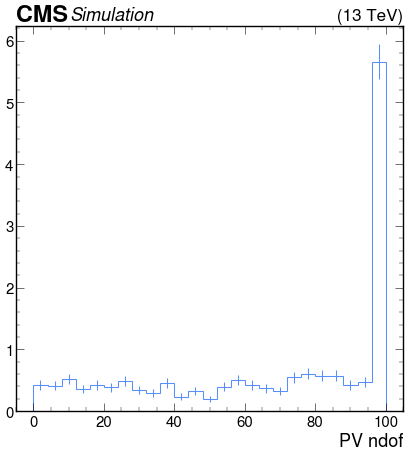

In [4]:
utilities.plot(out[samples[0]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f20f6bb7dd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f20d83d95e0>, text=[])

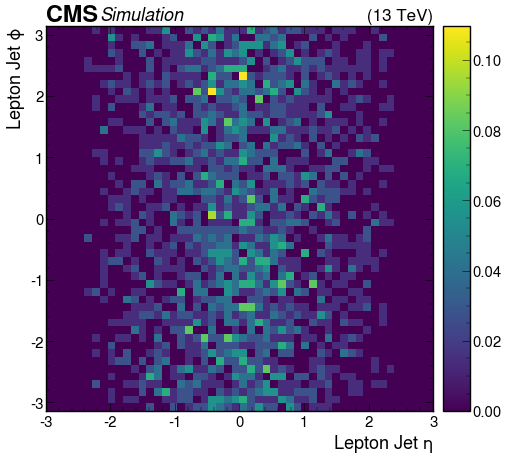

In [5]:
utilities.plot(out[samples[0]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f20d855aed0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

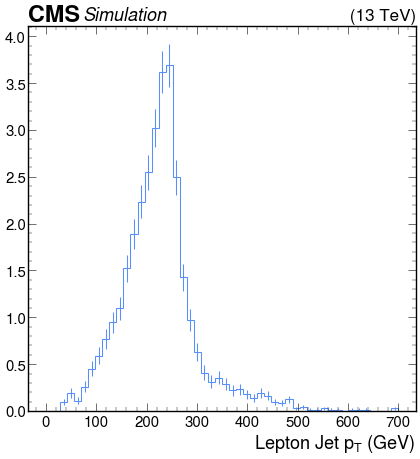

In [6]:
utilities.plot(out[samples[0]]["hists"]["lj_pt"][channels[0], ::2j])

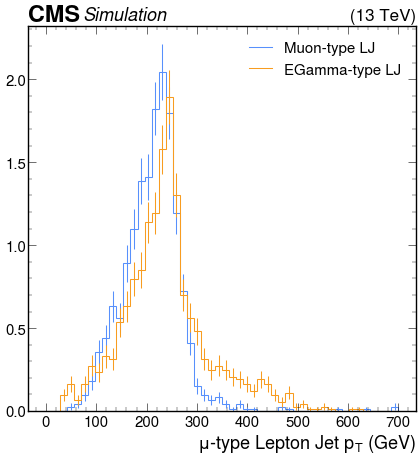

In [7]:
utilities.plot([
    out[samples[0]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()


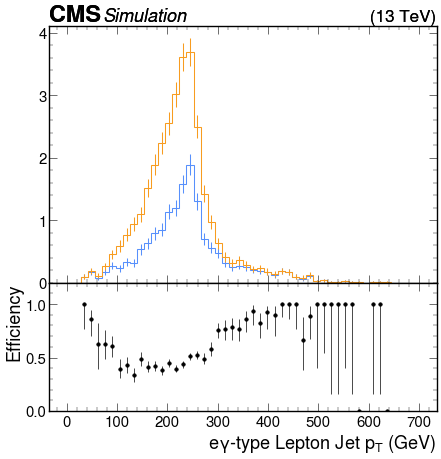

In [8]:
utilities.plot_ratio(
        out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
        out[samples[0]]["hists"]["lj_pt"]["2mu2e", ::2j],
)